In [7]:
import networkx as nx
import plotly.graph_objects as go

In [ ]:
!pip install networkx
!pip install plotly

In [19]:
import requests 

version = '5.103' 

# подгружаем токен из файлика на компьютере
with open('token.txt') as f:
    token = f.read()
    
def vk_download(method, parameters):
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa

vk_download('users.get', 'user_ids=6045249')

{'response': [{'first_name': 'Филипп',
   'id': 6045249,
   'last_name': 'Ульянкин',
   'can_access_closed': True,
   'is_closed': False}]}

In [56]:
users = vk_download('groups.getMembers', 'group_id=202592611&count=1000')
users = users['response']['items']
users_set = set(users)

In [ ]:
from tqdm import tqdm
import time
dct = dict()

for ppl in tqdm(users):
    friends = vk_download('friends.get', f'user_id={ppl}')
    
    if 'error' in friends:
        print('error:', ppl)
        continue
        
    friends = friends['response']['items']
    dct[ppl] = list( set(friends) & users_set )
    time.sleep(0.4)

In [87]:
G = nx.Graph()
G.add_nodes_from(users)

for k,v in dct.items():
    for item in v:
        G.add_edge(k, item)
        
graphs = list(nx.connected_components(G))

# размеры компонет связности
print([len(jtem) for jtem in graphs]) 

G = G.subgraph(graphs[0])

[259, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [90]:
nx.diameter(G)

6

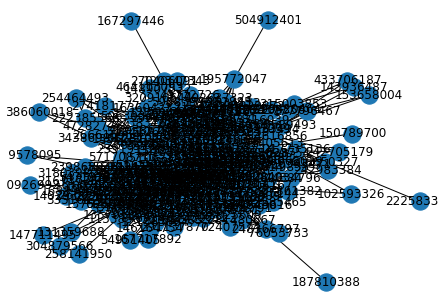

In [89]:
nx.draw(G, with_labels=True)

In [92]:
import plotly.express as px

df = px.data.iris() # iris is a pandas DataFrame
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [95]:
fig = px.scatter(df, x="sepal_width", y="sepal_length",
                 color="species", size='petal_length')
fig.show()

In [126]:
import plotly.graph_objects as go

fig = go.Figure(
    data = [
        go.Bar(x=[1, 2, 3], y=[1, 3, 2]),
        go.Bar(x=[4, 5], y=[3, 1]),   
    ],
    layout = {
        "title": {
            "text": "A Figure Specified By A Graph Object",
        }
    }
)

fig.add_annotation(x=2, y=3,
            text="Text annotation with arrow",
            showarrow=True,
            arrowhead=1)

fig.show()

In [141]:
list(G.edges())[:5]

[(1573651, 394536835),
 (1573651, 87605257),
 (1573651, 83760139),
 (1573651, 54061970),
 (1573651, 151474203)]

In [139]:
import numpy as np
np.sqrt(len(G.nodes))

16.09347693943108

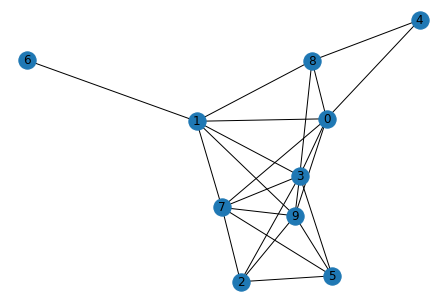

In [147]:
H = nx.random_geometric_graph(10, 0.5)
nx.draw(H, with_labels=True)

In [154]:
list(G.edges())[:3]
edge = (1573651, 394536835)
G.nodes[edge[0]]

{}

In [151]:
H.edges()
edge = (0, 8)
H.nodes[edge[0]]

{'pos': [0.33083160807397893, 0.4868885334538783]}

In [158]:
import random
random.random()

0.16168946673059326

In [159]:
for item in G.nodes:
    G.nodes[item]['pos'] = [random.random(), random.random()]

In [160]:
list(G.edges())[:3]
edge = (1573651, 394536835)
G.nodes[edge[0]]

{'pos': [0.07179241855443264, 0.3092771646382827]}

In [183]:
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',

    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [184]:
node_adjacencies = []
node_text = []

for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [189]:
fig = go.Figure(
        data=[edge_trace, node_trace],
    
         layout=go.Layout(
            title='Network graph made with Python',
            titlefont_size=16,
            showlegend=False,
            margin=dict(b=20,l=5,r=5,t=40),

            xaxis=dict(showgrid=False, 
                       zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, 
                       showticklabels=False))
            )
fig.show()

In [191]:
import numpy as np

2*(10 + np.log(4)*40 - np.log(5)*40)

2.1485158948632375

In [192]:
1.96**2

3.8415999999999997